# Evaluation of the experimental result for FP Vibrating Reed

## Part A: Resonance curve around first 3 resonance frequency at constant temperature

We measured the resonance curve around our 3 predicted resonance frequency: $\nu_0 = 144$ Hz, $\nu_1 = 908$ Hz and $\nu_2 = 2555$ Hz. Since we had around 15 hours for the measurement, we decided to measure the frequency range around  $\nu \pm 14$ Hz  with a step size of 0.04 Hz. Thus we got $14*2/0.04=700$ data for each curve. (The totoal measure time: $700*3*11/3600\approx6.4$ hrs, since for each data it takes around 11 seconds to finish measuring)

### 1. Plot and $Chi^2$-Fit for Lorentz curve
First we plot the data "Frequency-Amplitude" and draw a smooth curve. Then we make a $\chi^2$-Fit based on the Lorentz curve $A=\frac{A_0}{\sqrt{(\omega_0^2-\omega^2)^2+\gamma^2\omega^2}}$ (script (1.2))

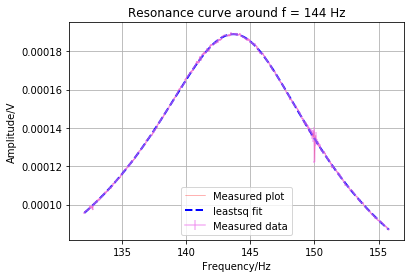

* Fit parameters and their error:
[ 143.9657315    13.08992106    0.35566931]
[ 0.00314232  0.01000721  0.00020126]
* Q factor and its error:
10.9982123531 0.00841152635946
* Resonance frequency and error:
143.771004356 0.00316065030451
* The degree of freedom is: 592
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 4.43503936486


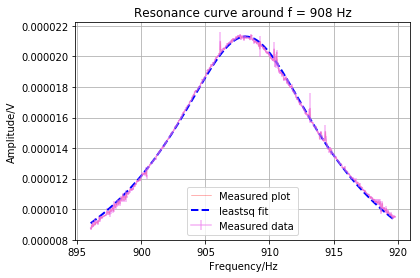

* Fit parameters and their error:
[  9.08179575e+02   1.13208272e+01   2.19069162e-01]
[ 0.00621797  0.01856421  0.00025907]
* Q factor and its error:
80.2220155891 0.131551439632
* Resonance frequency and error:
908.187195141 0.00621796641884
* The degree of freedom is: 592
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 7.79825858408


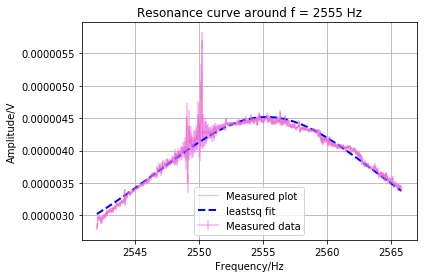

* Fit parameters and their error:
[  2.55534157e+03   2.37506690e+01   2.74234094e-01]
[ 0.03645962  0.16194444  0.00156214]
* Q factor and its error:
107.590298517 0.733608318415
* Resonance frequency and error:
2555.39940609 0.0364673216568
* The degree of freedom is: 592
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 6.26391024797


In [25]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt


# Fit parameter: p = (omega_0, gamma, A)

def lorentz(p,x):
    return p[2] /np.sqrt((p[0]**2-x**2)**2+(p[1]**2*(x**2)))
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))
# the error between fit function and the measured data
def errlorentz(p,x,y):
    return lorentz(p,x)-y

def dQ(w, dw, g, dg):
    return np.sqrt((dw/g)**2+(w*dg/g**2)**2)

x,y,erry=np.loadtxt('NightM',skiprows=1,usecols=(0,3,4),converters={0:comma_to_float, 3:comma_to_float, 4:comma_to_float}, unpack=True)
i = 1 # row-index
t = 0 # iteration index
p_00 = [[144., 11., 2.5e-1],[908., 11., 2.5e-1],[2555., 11., 2.5e-1]] # Initial guess
c = [-0.327, 0.108, 0.524]

while t < 3:
    
    # here I didn't use all the data
    
    x0 = x[i+50:i+700-55]
    y0 = y[i+50:i+700-55]
    erry0 = erry[i+50:i+700-55]
    p_0 = p_00[t]
    pfit, pcov, infodict, errmsg, success = leastsq(errlorentz, 
                                                    p_0, 
                                                    args=(x0,y0),
                                                    Dfun=None,
                                                    full_output=1,
                                                    ftol=1e-9,
                                                    xtol=1e-9,
                                                    maxfev=100000,
                                                    epsfcn=1e-10,
                                                    factor=0.1)

    plt.plot(x0, y0, 'r-', label='Measured plot', linewidth=0.5, alpha=0.6) # alpha for transparency
    plt.errorbar(x0, y0, yerr = erry0, color='violet', label='Measured data', alpha = 0.6)
    plt.plot(x0, lorentz(pfit,x0), 'b--', linewidth=2, label='leastsq fit')
    plt.title("Resonance curve around f = %1.0f Hz"%p_00[t][0])
    plt.grid(which='major')
    plt.legend(loc=8)
    plt.xlabel("Frequency/Hz")
    plt.ylabel("Amplitude/V")
    plt.show()
    
    # according to the documentation of scipy.optimize.leastsq, the covariance matrix of fitted parameters is calculated 
    # by the returned covariance function times reduced chi^2
    # the error of fitted parameter is then the square root of the diagonal elements
    # infodict["fvec"] = errlorentz(pfit, x0, y0)
    
    s_sq = (infodict["fvec"]**2).sum()/(len(y0)-len(p_0))
    pcov = pcov * s_sq
    perr = np.sqrt(np.diag(pcov))
    print("* Fit parameters and their error:")
    print(pfit)
    print(perr)
    print("* Q factor and its error:")
    print(pfit[0]/pfit[1], dQ(pfit[0], perr[0], pfit[1], perr[1]))
    print("* Resonance frequency and error:")
    wR = np.sqrt(pfit[0]**2+pfit[1]**2*c[t])
    print(wR, np.sqrt((pfit[0]*perr[0])**2+(pfit[1]*perr[1]*c[t])**2)/wR)
    print("* The degree of freedom is: %s"%(len(y0)-len(p_0)))
    chi_sq = ((infodict["fvec"]/erry0)**2).sum()/(len(y0)-len(p_0))
    print("* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: %s"%chi_sq)
    t += 1
    i = t * 700 + t + 1


### 2. Fit-result anaylsis
From the fit we can read out the eigenfrequency $\omega_0$, $A$, the damping fator $\gamma$, and thus calculate the resonance frequency $\omega_R=\sqrt{\omega_0^2+c_n*\gamma^2}$ (script (1.5)) with error $\Delta\omega_R=\sqrt{\frac{(\omega_0\Delta\omega_0)^2+(c_n*\gamma\Delta\gamma)^2}{\omega_0^2-c_n*\gamma^2}}$. Also we can calculate the Q factor using $Q=\frac{\omega_0}{\gamma}$ with error $\Delta Q = \sqrt{(\frac{\Delta\omega}{\gamma})^2+(\frac{\omega\Delta\gamma}{\gamma^2})^2}$. The following table gives an overview of the above mentioned quantaties.

|$\omega_0$ (Hz)|$143.9658\pm0.0031$|$908.1839\pm0.0063$|$2555.365\pm0.035$|
|-|-|-|-|
|$\omega_R$ (Hz)|$143.7710\pm0.0032$|$908.1872\pm0.0062$|$2555.3994\pm0.0036$|
|$A$|$0.35576\pm0.00019$|$0.21898\pm0.00026$|$0.2737\pm0.0014$|
|$\gamma$|$13.0939\pm0.0097$|$11.315\pm0.019$|$23.70\pm0.15$|
|$Q$|$10.9949\pm0.0082$|$80.26\pm0.13$|$105.25\pm0.70$|

We see that the Q factor has different value for every vibration mode. The reason is that the Q factor is defined as the ratio of total energy and lost energy. The higher the vibration mode is, the less energy it losts because it experiences shorter time. 

We can calculate the frequency ratio from the fit parameter: $\frac{\nu_1}{\nu_0} = 6.30833\pm0.00014$, $\frac{\nu_2}{\nu_0} = 17.74981\pm0.00045$. These have a deviation of $0.04133(0.66\%)$ and $0.20181(1.15\%)$ from the theoretical value $6.267$ and $17.548$ (from script (1.24)).

We describe the quality of the fit quantitatively by checking the ratio of chi^2 and degree of fredom of fit. In our case the reduced chi^2 for all resonance frequency is too large, we have to say that the p-value is smaller than 0.1% and our fit is "very bad". The reason for that could be that we have too small statistical error and ignored the relativ large systematic error.


### 3. Another method to calculate Q factor

In addition, we can calculate Q factor from the width of the frequency curve between the amplitude where it reach $1/\sqrt{2}$ of its maximum. For the $A\sin{\phi}$-curve the points correspond to $A=A/2$. For the $A\cos{\phi}$-curve the points correspond to its two extreme values.

Because we read the FWFM from the cursor manually, its precision could be very low. So there are big difference between that value and the value that we calculated using Fit-parameter. Difference ~ 1.1(~25%)


<IPython.core.display.Javascript object>


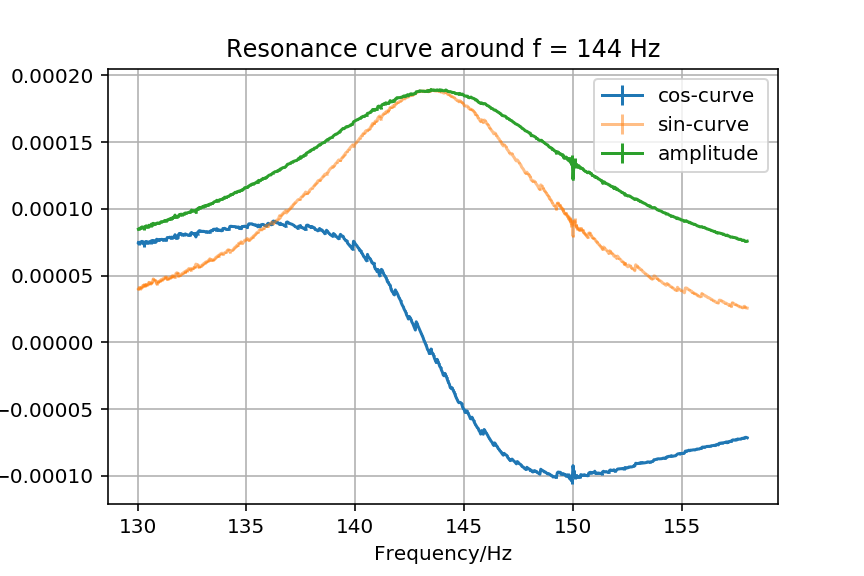

9.469524e-05
0.0001339192927
Thus we get the Q factor: 5.5066232272901425
5.319453495260656


In [18]:
%matplotlib notebook
f,A0x,dA0x = np.loadtxt('Freq0',skiprows=1,usecols=(0,5,6),converters={0:comma_to_float, 5:comma_to_float, 6:comma_to_float}, unpack=True)
plt.errorbar(f, A0x, yerr = dA0x, label="cos-curve")
PS,A0y,dA0y = np.loadtxt('Freq0',skiprows=1,usecols=(1,7,8),converters={1:comma_to_float, 7:comma_to_float, 8:comma_to_float}, unpack=True)
plt.errorbar(f, A0y, yerr = dA0y, label="sin-curve",alpha=0.5)
y,erry=np.loadtxt('Freq0',skiprows=1,usecols=(3,4),converters={3:comma_to_float, 4:comma_to_float}, unpack=True)
plt.errorbar(f, y, yerr = erry, label="amplitude")
plt.title("Resonance curve around f = 144 Hz")
plt.grid(which='major')
plt.xlabel("Frequency/Hz")
plt.ylabel("Voltage/V")
plt.legend()
plt.show()

Amax = max(A0y)
print(Amax/2)
print(Amax/np.sqrt(2))
# we read the value out by using interactive cursor
# on the left side: 136.659, on the right side: 149.704
# or using A/sqrt(2) on Amplitude-curve: 136.843 and 150.163
dw = 149.704 - 136.659
Q = 143.6678/2/dw
dw2 = 150.163-136.659
Q2 = 143.6678/2/dw2
print("Thus we get the Q factor:", Q)
print(Q2)


## Part B: Resonance curve around 0. resonance frequency at different temperature from 33°C to 53°C

We measured vibration of the reed at different temperature and study its resonance frequency. To calculate the temperature from the measured voltage on Pt-100-Sensor, we use the formel $Temperature = (Voltage - 1.000325)\cdot 259.2684$ (script(3.1))

To set each temperature we setted 20 min as waiting time. -> 

### 1. $Chi^2$-Fit for Lorentz curve at every temperature
To get the resonance frequency we apply lorentz-fit to data for every temperature. Here we shrink our range of data to avoid 125 Hz where disturbation from experimental environment yields huge error. 


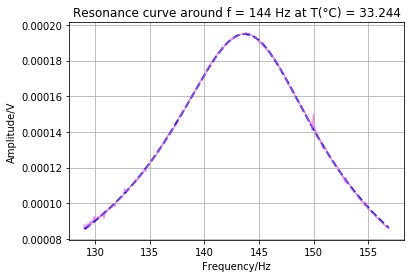

[ 144.00437101   13.62561525    0.38190687]
[ 0.00523145  0.01560945  0.00031771]
5.09295651263e-13
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 9.20701612267


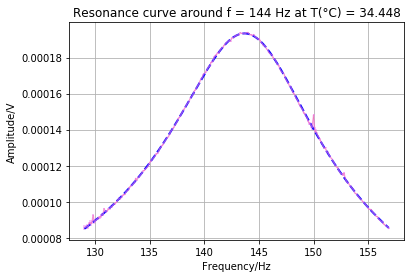

[ 143.99646899   13.61964932    0.378843  ]
[ 0.00512311  0.01528453  0.00030871]
4.81455112305e-13
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 4.39749961273


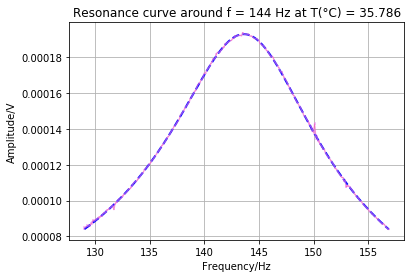

[ 143.93031558   13.40478089    0.3720224 ]
[ 0.00400822  0.01188701  0.00023887]
3.00564854698e-13
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 4.41216647685


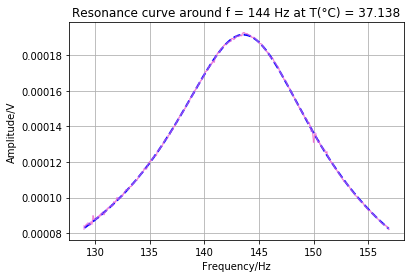

[ 143.88586078   13.31559209    0.36635942]
[ 0.00409104  0.01210401  0.00024084]
3.11004876409e-13
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 3.39958690837


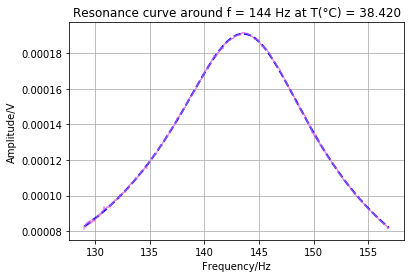

[ 143.85480582   13.24544117    0.36363856]
[ 0.00291591  0.0086108   0.00017081]
1.58604297227e-13
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 2.71287204316


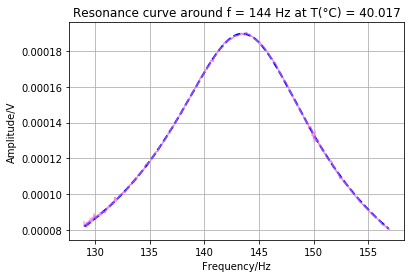

[ 143.78775462   13.17490393    0.35896252]
[ 0.00367291  0.01082851  0.00021295]
2.5015302766e-13
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 3.42389546262


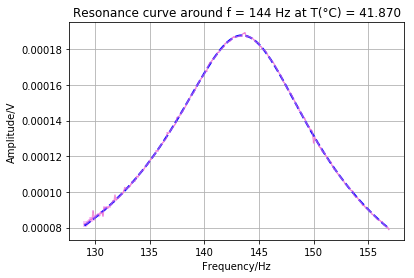

[ 143.75491133   13.13327286    0.35420764]
[ 0.00449589  0.01324116  0.00025762]
3.69200197355e-13
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 3.55072425168


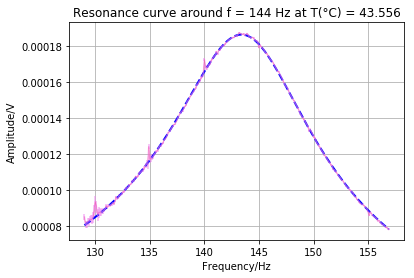

[ 143.69555381   13.09323725    0.35074941]
[ 0.00801615  0.0235905   0.00045561]
1.16471026299e-12
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 3.72572872676


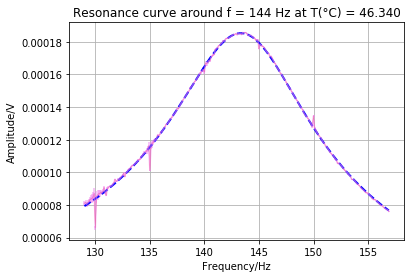

[ 143.63099027   12.89325797    0.34273957]
[ 0.01194519  0.03495126  0.0006681 ]
2.60458321844e-12
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 12.2878265544


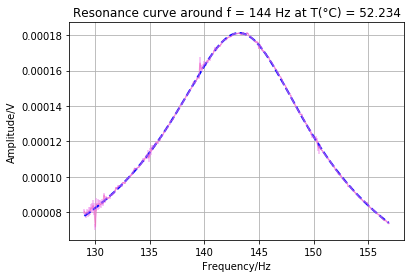

[ 143.47489289   12.84007023    0.33354313]
[ 0.00715552  0.02092532  0.00039053]
9.01065281376e-13
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 2.11379239559


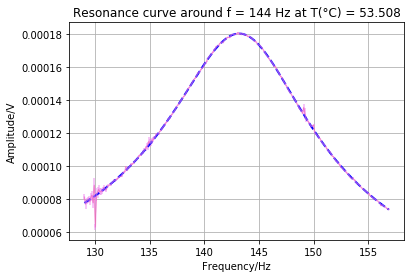

[ 143.4662017    12.79661446    0.33107734]
[ 0.01039636  0.0303629   0.00056407]
1.89577931209e-12
* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: 2.22756625958


In [22]:
%matplotlib inline
import statistics as stc

Temp, errTemp, Freq,Amp,errAmp=np.loadtxt('tempNight',skiprows=1,usecols=(0,1,2,5,6),converters={0:comma_to_float,1:comma_to_float,2:comma_to_float, 5:comma_to_float, 6:comma_to_float}, unpack=True)
p_0 = np.array([144, 11., 2.5e-1], dtype=np.double) #Initial guess
a = 100
b = 380
temp = []
freq = []
errtemp = []
errfreq = []
while b < 5513:
    Freq0 = Freq[a:b]
    Amp0 = Amp[a:b]
    errAmp0 = errAmp[a:b]
    Temp0 = Temp[a:b]
    #errTemp0 = errTemp[a:b] we don't use this because the change of voltage is big
    pfit, pcov, infodict, errmsg, success = leastsq(errlorentz, 
                                            p_0, 
                                            args=(Freq0,Amp0),
                                            Dfun=None,
                                            ftol=1e-9,
                                            xtol=1e-9,
                                            maxfev=100000,
                                            epsfcn=1e-10,
                                            factor=0.1,
                                            full_output=1)
    plt.plot(Freq0, Amp0, 'r-', label='Measured plot', linewidth=0.5, alpha=0.6) # alpha for transparency
    plt.errorbar(Freq0, Amp0, yerr = errAmp0, color='violet', label='Measured data', alpha = 0.6)
    plt.plot(Freq0, lorentz(pfit,Freq0), 'b--', linewidth=2, label='leastsq fit')
    plt.title("Resonance curve around f = 144 Hz at T(°C) = %1.3f"%np.mean(Temp0))
    plt.grid(which='major')
    #plt.legend()
    plt.xlabel("Frequency/Hz")
    plt.ylabel("Amplitude/V")
    plt.show()
    s_sq = ((errlorentz(pfit, Freq0, Amp0))**2).sum()/(len(Amp0)-len(p_0))
    pcov = pcov * s_sq
    perr = np.sqrt(np.diag(pcov))
    print(pfit)
    print(perr)
    print(s_sq)
    chi_sq = ((infodict["fvec"]/errAmp0)**2).sum()/(len(Amp0)-len(p_0))
    print("* The ratio of chi^2 and degree of freedom of fit(reduced chi^2) is: %s"%chi_sq)
    temp.append(np.mean(Temp0))
    freq.append(np.sqrt(pfit[0]**2-0.327*pfit[1]**2))
    errtemp.append(stc.stdev(Temp0))
    errfreq.append(np.sqrt(((pfit[0]*perr[0])**2+(pfit[1]*perr[1]*0.327)**2)/(pfit[0]**2-0.327*pfit[1]**2)))
    a += 501
    b += 501

### 2.  $Chi^2$-Fit for linear function (linear regression)

To get the relation between temperature and resonance frequency we apply a linear regression.

How to understand the minus sign of the slope physically? According to the formula of eigenfrequency, it is proportional to young's modulus and $\frac{d}{l^2}$. The elasticity (young's modulus) of the reed decreases when temperature gets higher.(Wikipedia) Also, the expand of metal in high temperature(thermal expansion) makes the factor $\frac{d}{l^2}$ smaller. Thus the eigenfrequency decreases with increasing temperature, and therefore also the resonance frequency. 